In [ ]:
#core
import pandas as pd
import numpy as np
#plot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,silhouette_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans  ,AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
#xgboost
from xgboost import XGBClassifier


In [ ]:
#using na_values=" " to avoid empty strings and convert dtype of the column to it's basic value (float)
data=pd.read_csv("/content/drive/MyDrive/Dataset/Telecom Customers Churn.csv",na_values=" ")
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [ ]:
data=data.drop("customerID",axis=1)
#encoding the target
data['Churn'] = data['Churn'].replace({"Yes":1,"No":0})
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data_cleaned=data.copy()

In [ ]:
def fill_missing_totalcharges(row):
    if pd.isna(row['TotalCharges']):
        return row['tenure']* row['MonthlyCharges']
    else:
        return row['TotalCharges']


In [ ]:
data_cleaned['TotalCharges'] = data.apply(fill_missing_totalcharges, axis=1)
data_cleaned.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data_cleaned.shape

(7043, 20)

# Data Analysis

In [ ]:
# Function to remove outliers based on IQR and visualize again
def remove_and_plot_outliers(df, numeric_cols):
    df_clean = df.copy()

    for col in numeric_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the outlier step (1.5 times the IQR)
        outlier_step = 1.5 * IQR

        # Identify outliers
        outliers = (df_clean[col] < (Q1 - outlier_step)) | (df_clean[col] > (Q3 + outlier_step))

        # Plot the box plot before removing outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot Before Removing Outliers for {col}')
        plt.show()

        # Drop outliers
        df_clean = df_clean[~outliers]

        # Plot the box plot after removing outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df_clean[col])
        plt.title(f'Box Plot After Removing Outliers for {col}')
        plt.show()

        print(f"Removed {outliers.sum()} outliers from column '{col}'")

    return df_clean

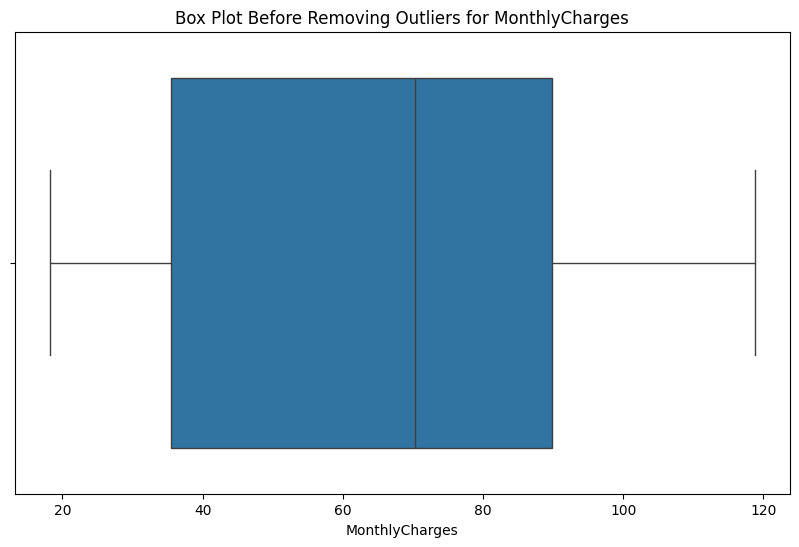

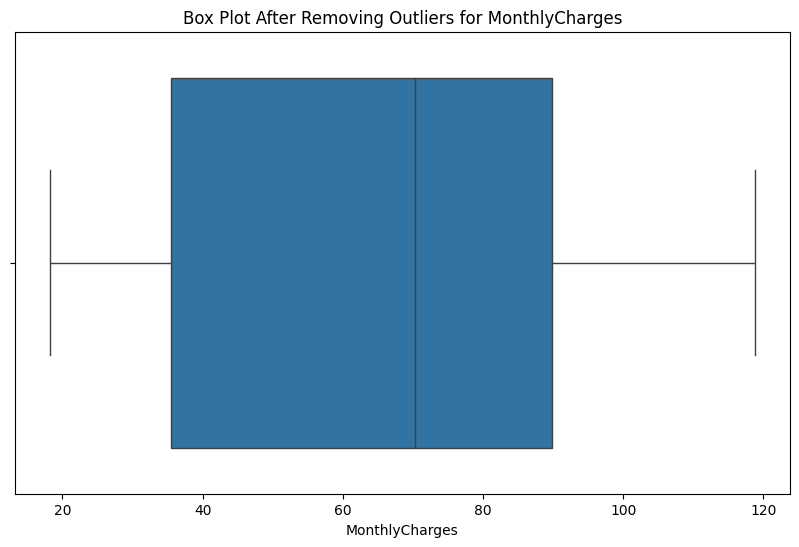

Removed 0 outliers from column 'MonthlyCharges'


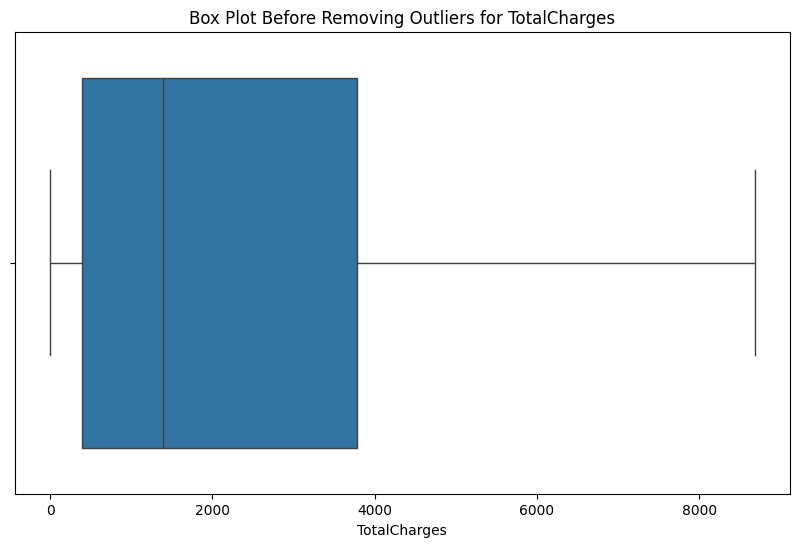

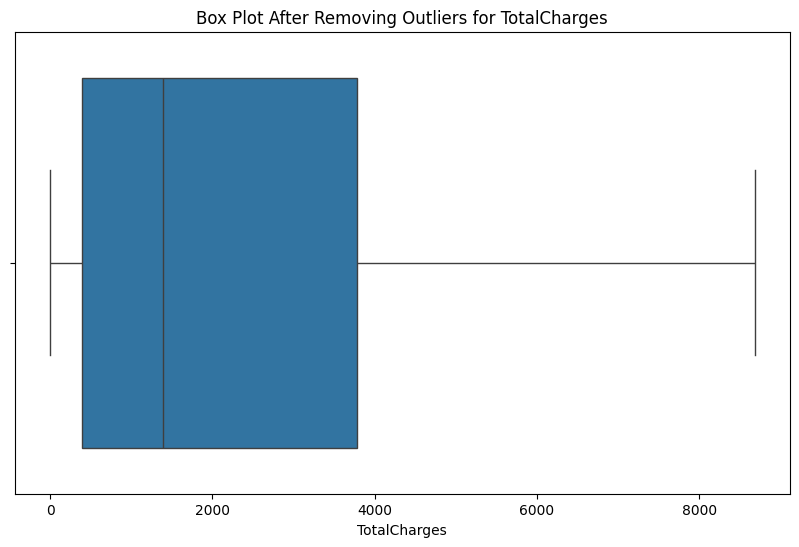

Removed 0 outliers from column 'TotalCharges'
Original data shape: (7043, 20)
Cleaned data shape: (7043, 20)


In [ ]:
# Remove outliers and visualize
data_cleaned = remove_and_plot_outliers(data_cleaned, ['MonthlyCharges','TotalCharges'])

# Verify the results
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

Churn Distribution

<ipython-input-323-fbe51bb9979d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




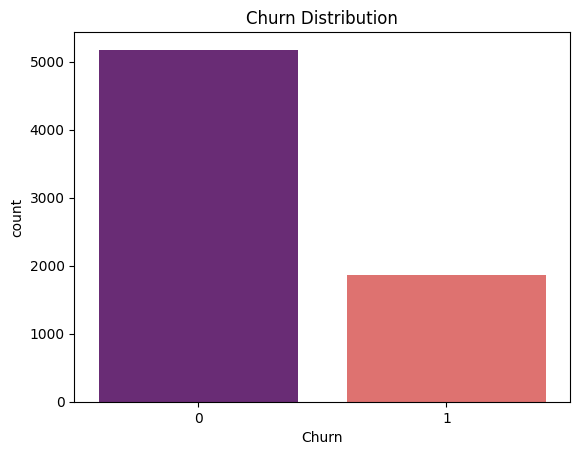

In [ ]:
#find distribution
sns.countplot(x='Churn', data=data_cleaned,palette='magma')
plt.title('Churn Distribution')
plt.show()

Gender Distribution

<ipython-input-324-1646caf04988>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




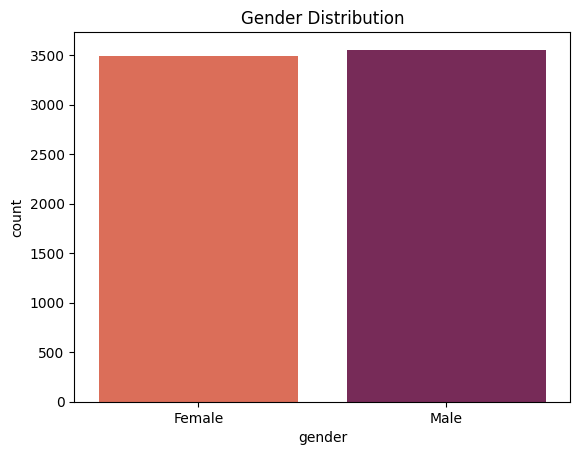

In [ ]:
sns.countplot(x='gender', data=data_cleaned,palette='rocket_r')
plt.title('Gender Distribution')
plt.show()

Distribution of Monthly Charges

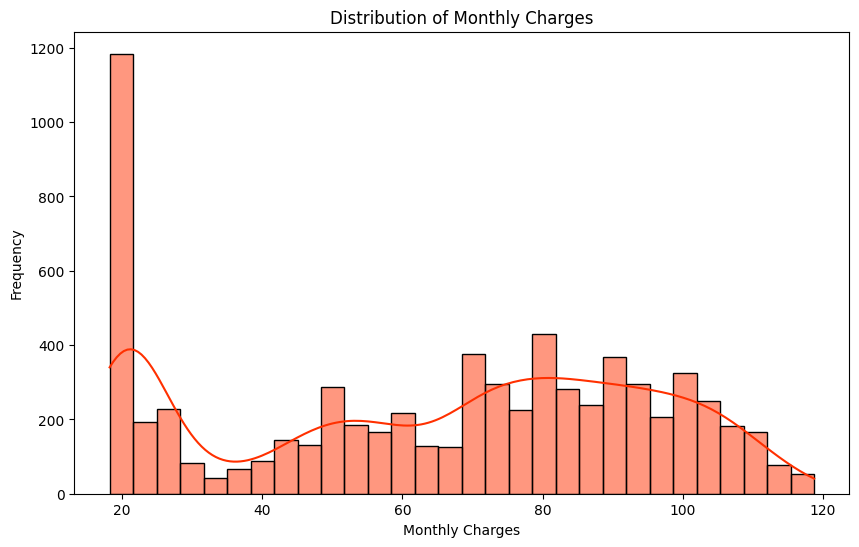

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['MonthlyCharges'], bins=30, kde=True,color='#ff3000')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

Monthly Charges vs. Total Charges

In [ ]:
fig = px.scatter(data_cleaned, x='MonthlyCharges', y='TotalCharges', color='Churn',
                 title='Monthly Charges vs. Total Charges',
                 labels={'MonthlyCharges': 'Monthly Charges', 'TotalCharges': 'Total Charges'})
fig.show()

Churn Rate by Internet Service

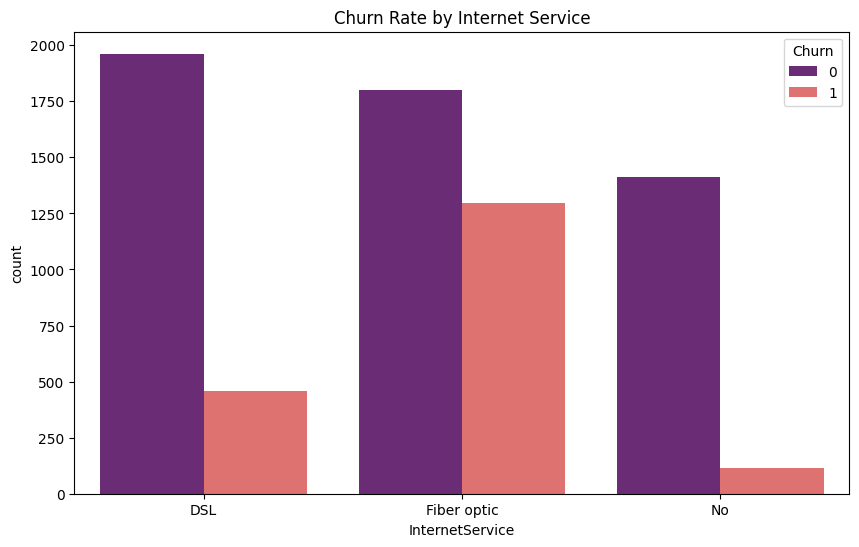

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=data_cleaned,palette='magma')
plt.title('Churn Rate by Internet Service')
plt.show()

Churn Rate by Contract Type

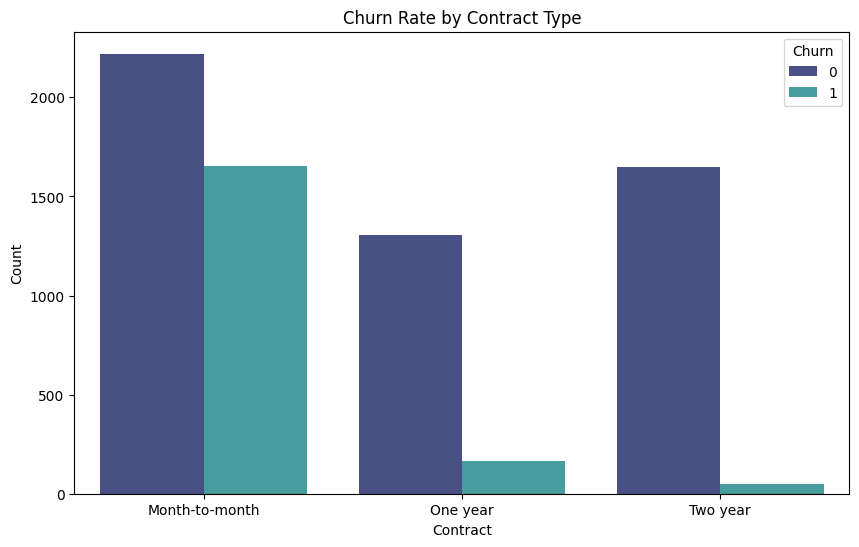

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data_cleaned,palette='mako')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Count')
plt.show()

Churn rate by PaymentMethod

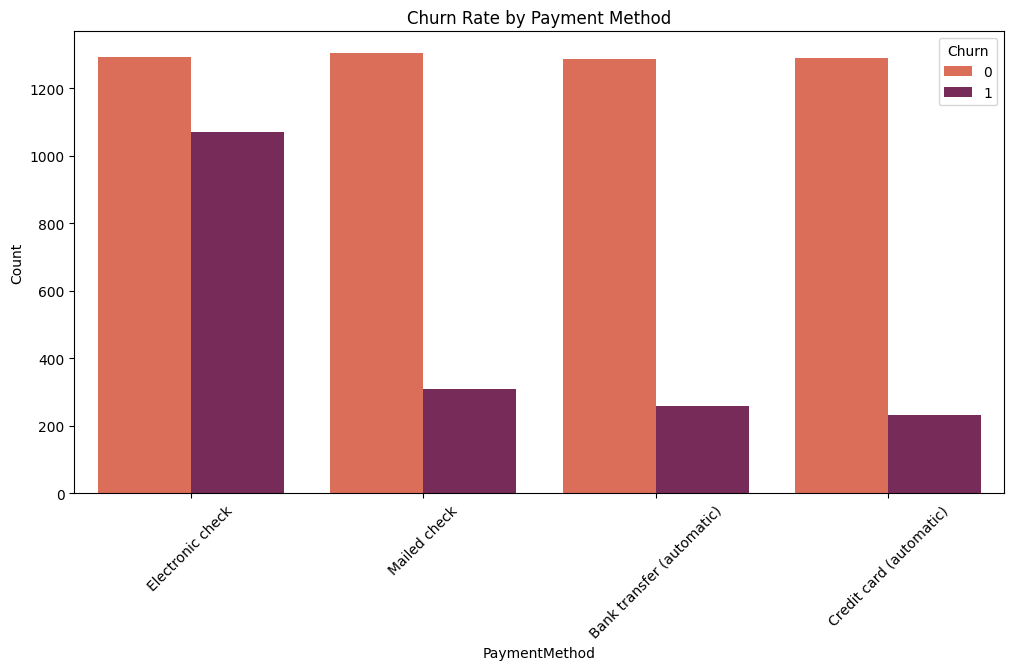

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data_cleaned,palette='rocket_r')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

Churn rate by SeniorCitizen

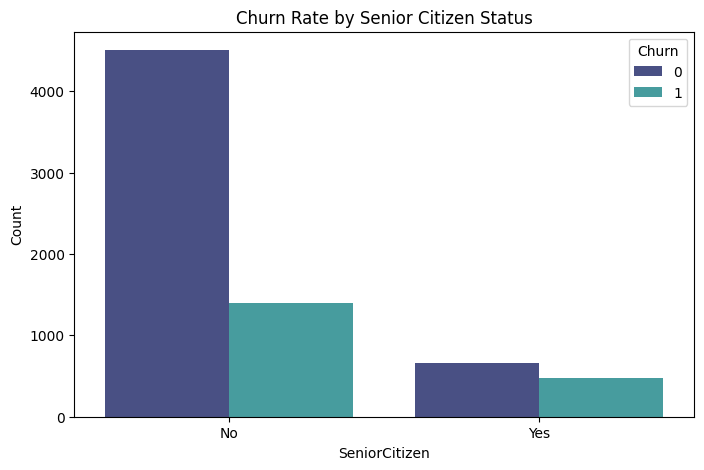

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data_cleaned,palette='mako')
plt.title('Churn Rate by Senior Citizen Status')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Count')
plt.show()

Monthlycharges vs tenure

In [ ]:
fig = px.scatter(data_cleaned,
                 x='tenure',
                 y='MonthlyCharges',
                 color='Churn',
                 title='Monthly Charges vs. Tenure',
                 labels={'tenure': 'Tenure', 'MonthlyCharges': 'Monthly Charges'},
                 hover_data=['gender', 'Contract','TotalCharges'])

# Show the figure
fig.show()

Perecentage of male and female Cutomers

In [ ]:
gender_counts = data_cleaned['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']


fig = px.pie(gender_counts,
             values='count',
             names='gender',
             title='Percentage of Male and Female Customers',
             color='gender',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

Percentage of SeniorCitizen and non-SeniorCitizen

In [ ]:
senior_counts = data_cleaned['SeniorCitizen'].value_counts().reset_index()
senior_counts.columns = ['SeniorCitizen', 'count']
senior_counts['SeniorCitizen'] = senior_counts['SeniorCitizen'].map({0: 'Non-Senior Citizen', 1: 'Senior Citizen'})
fig = px.pie(senior_counts,
             values='count',
             names='SeniorCitizen',
             title='Percentage of Senior Citizens and Non-Senior Citizens',
             color='SeniorCitizen',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

Comulative Distribution of monthly charges by churn status

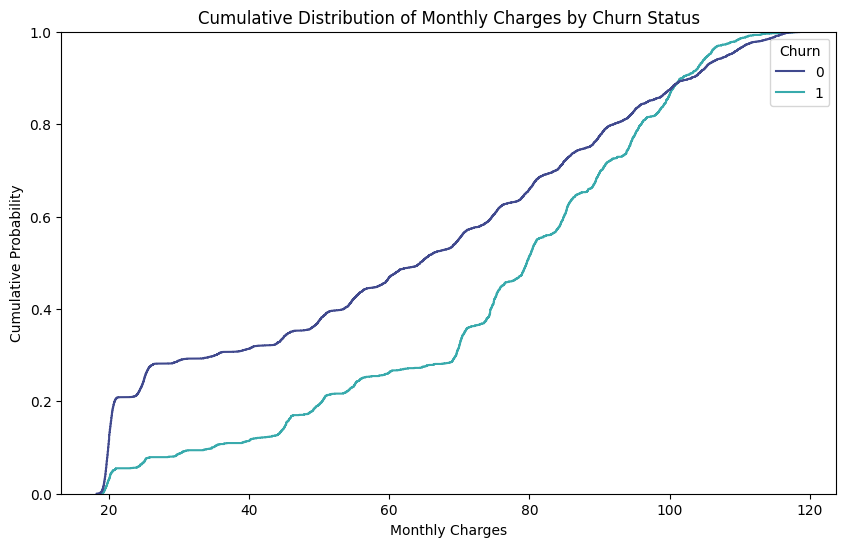

In [ ]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=data_cleaned, x='MonthlyCharges', hue='Churn',palette='mako')
plt.title('Cumulative Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Cumulative Probability')
plt.show()

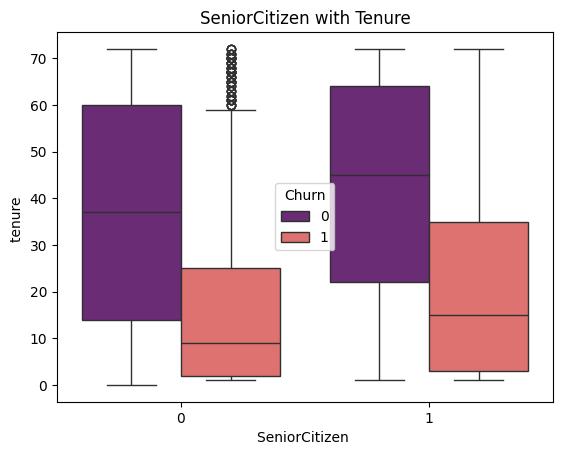

In [ ]:
plt.figure()
sns.boxplot(x = 'SeniorCitizen',y = 'tenure',data = data_cleaned,hue = 'Churn',palette = 'magma');
plt.title('SeniorCitizen with Tenure')
plt.xlabel('SeniorCitizen ')
plt.ylabel('tenure ')
plt.show()

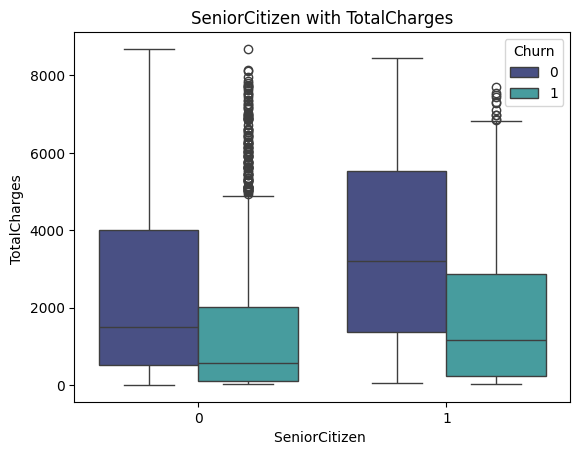

In [ ]:
plt.figure()
sns.boxplot(x = 'SeniorCitizen',y = 'TotalCharges',data = data_cleaned,hue = 'Churn',palette = 'mako');
plt.title('SeniorCitizen with TotalCharges')
plt.xlabel('SeniorCitizen ')
plt.ylabel('TotalCharges ')
plt.show()

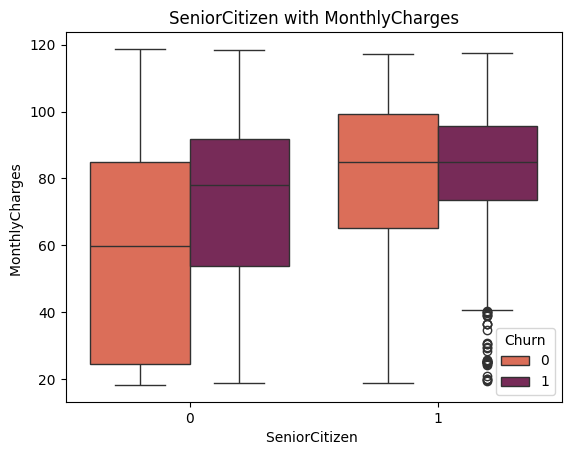

In [ ]:
plt.figure()
sns.boxplot(x = 'SeniorCitizen',y = 'MonthlyCharges',data = data_cleaned,hue = 'Churn',palette = 'rocket_r');
plt.title('SeniorCitizen with MonthlyCharges')
plt.xlabel('SeniorCitizen ')
plt.ylabel('MonthlyCharges ')
plt.show()

# Supervised Modelling

In [ ]:
#getting categorocal data
categoricalData=[x for x in data_cleaned.columns if data_cleaned[x].dtype=="object" ]
print("number of Categorical Data :",len(categoricalData))
print('Categorical data are :',(categoricalData))

number of Categorical Data : 15
Categorical data are : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
#setteing training and target set
y=data_cleaned['Churn']
X = data_cleaned.drop(['Churn'], axis=1)
#Using One Hot Encoding to encode categorical Data
X_dum = pd.get_dummies(X)
#scaling the data
nor=MinMaxScaler()
X_scaled=pd.DataFrame(nor.fit_transform(X_dum))
X_scaled.columns = X_dum.columns

In [ ]:
#Function to plot heatmap CM
def Plotconfusion(y_test, y_pred):
  cm = confusion_matrix(y_test,y_pred)
  names = ['True Neg','False Pos','False Neg','True Pos']
  counts = [value for value in cm.flatten()]
  percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

**1- Logistic Regression**

In [ ]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=44,shuffle=True)
# instantiate the model
logreg = LogisticRegression()
# fit the model
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)
print('Training Score : ',round(logreg.score(X_train,y_train)*100, 2),'%')
print('Testing Score : ',round(logreg.score(X_test,y_test)*100,2),'%')
print('Roc_Auc Score : ',round(roc_auc_score(y_test, y_pred1)*100,2),'%')

Training Score :  80.71 %
Testing Score :  80.62 %
Roc_Auc Score :  72.24 %


Hyperparameter tuning

Training Score :  79.96 %
Testing Score :  82.47 %
Roc_Auc Score :  74.44 %


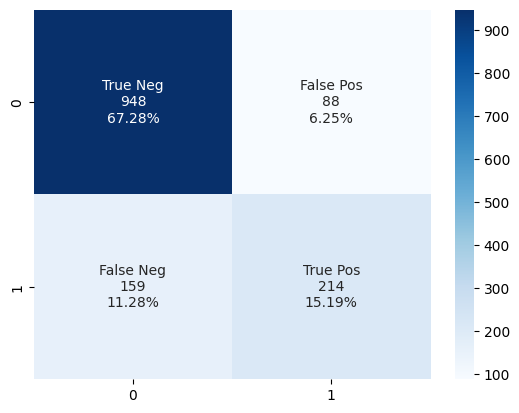

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,shuffle=True)
logreg = LogisticRegression(penalty='l1', solver='saga', C=0.1,random_state=0)
logreg.fit(X_train, y_train)
y_pred2 = logreg.predict(X_test)
print('Training Score : ',round(logreg.score(X_train,y_train)*100, 2),'%')
print('Testing Score : ',round(logreg.score(X_test,y_test)*100,2),'%')
print('Roc_Auc Score : ',round(roc_auc_score(y_test, y_pred2)*100,2),'%')
Plotconfusion(y_test,y_pred2)

Try Feature Selection

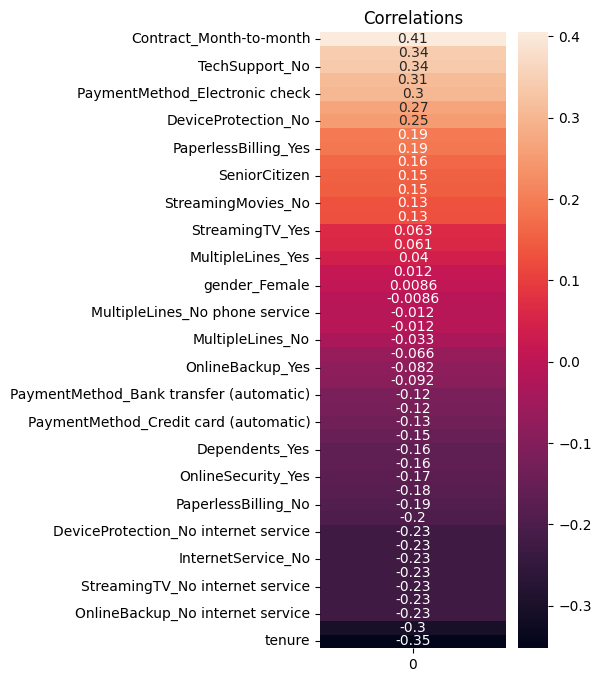

In [ ]:
corr = X_scaled.corrwith(y).sort_values(ascending = False).to_frame()
plt.subplots(figsize = (3,8))
sns.heatmap(corr,annot = True);
plt.title('Correlations');

In [ ]:
#selecting top best 60% of features
sel_=SelectKBest(f_classif, k=round(X_scaled.shape[1]*0.6))
X_scaled_filtered=sel_.fit_transform(X_scaled, y)
X_scaled_filtered.shape

(7043, 27)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_filtered, y, test_size=0.2, random_state=42,shuffle=True)
logreg = LogisticRegression(penalty='l1', solver='saga', C=0.1,random_state=0)
logreg.fit(X_train, y_train)
y_pred3 = logreg.predict(X_test)
print('Training Score : ',round(logreg.score(X_train,y_train)*100, 2),'%')
print('Testing Score : ',round(logreg.score(X_test,y_test)*100,2),'%')
print('Roc_Auc Score : ',round(roc_auc_score(y_test, y_pred3)*100,2),'%')
print('Confusion matrix : \n',confusion_matrix(y_test, y_pred3))

Training Score :  79.66 %
Testing Score :  81.69 %
Roc_Auc Score :  73.31 %
Confusion matrix : 
 [[944  92]
 [166 207]]


**2- SVC**

Training Score :  79.73 %
Testing Score :  82.11 %
Roc_Auc Score :  74.8 %


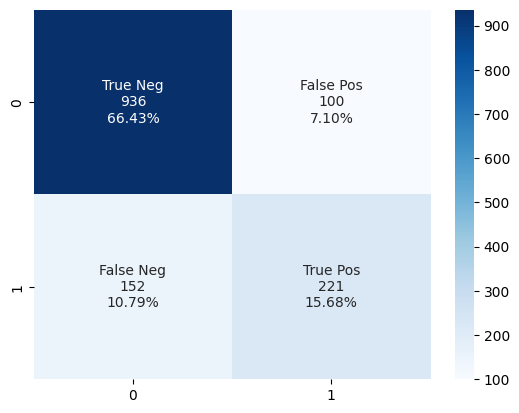

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,shuffle=True)
svm_model = SVC(kernel='linear')
#fitting our data
svm_model.fit(X_train,y_train)

    #predicting values
print('Training Score : ',round(svm_model.score(X_train,y_train)*100, 2),'%')
print('Testing Score : ',round(svm_model.score(X_test,y_test)*100,2),'%')
y_pred4 = svm_model.predict(X_test)
print('Roc_Auc Score : ',round(roc_auc_score(y_test, y_pred4)*100,2),'%')
Plotconfusion(y_test,y_pred4)

**3-XGB Classifier**

Training Score :  81.65 %
Testing Score :  82.68 %
Roc_Auc Score :  72.51 %
Confusion matrix : 
 [[983  79]
 [165 182]]


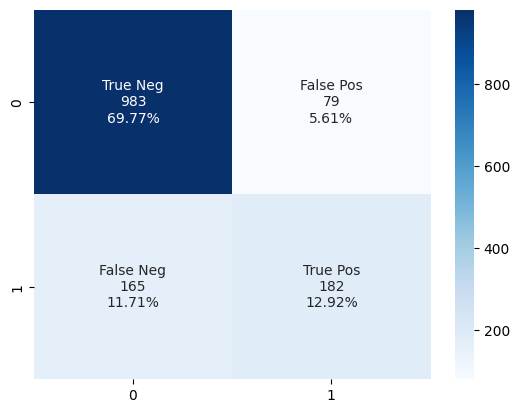

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=35,shuffle=True)
XGmodel = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
XGmodel.fit(X_train, y_train)
print('Training Score : ',round(XGmodel.score(X_train,y_train)*100, 2),'%')
print('Testing Score : ',round(XGmodel.score(X_test,y_test)*100,2),'%')
ypred = XGmodel.predict(X_test)
print('Roc_Auc Score : ',round(roc_auc_score(y_test, ypred)*100,2),'%')
print('Confusion matrix : \n',confusion_matrix(y_test, ypred))
Plotconfusion(y_test,ypred)

**4- Random Forest**

In [ ]:
#setteing training and target set
df=data.dropna()
y=df['Churn']
X = df.drop(['Churn'], axis=1)
#Using One Hot Encoding to encode categorical Data
X_dum = pd.get_dummies(X)
#scaling the data
st=StandardScaler()
X_scaled_st=pd.DataFrame(st.fit_transform(X_dum))
X_scaled_st.columns = X_dum.columns
#using random forest classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled_st, y, test_size=0.2, random_state=74,shuffle=True)

rand = RandomForestClassifier()

#fitting the data
rand.fit(X_train,y_train)
y_pred5 = rand.predict(X_test)
print('Training Score : ',round(rand.score(X_train,y_train)*100, 2),'%')
print('Testing Score : ',round(rand.score(X_test,y_test)*100,2),'%')
print('Roc_Auc Score : ',round(roc_auc_score(y_test, y_pred5)*100,2),'%')
print('Confusion matrix : \n',confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

Training Score :  99.79 %
Testing Score :  80.03 %
Roc_Auc Score :  70.78 %
Confusion matrix : 
 [[943 115]
 [166 183]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1058
           1       0.61      0.52      0.57       349

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Hyperparameter tuning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_st, y, test_size=0.2, random_state=74,shuffle=True)

rand = RandomForestClassifier(n_estimators=700,
                              n_jobs=-1,
                              random_state =91,
                              max_leaf_nodes = 120)

#fitting the data
rand.fit(X_train,y_train)
y_pred6 = rand.predict(X_test)
print('Training Score : ',round(rand.score(X_train,y_train)*100, 2),'%')
print('Testing Score : ',round(rand.score(X_test,y_test)*100,2),'%')
print('Roc_Auc Score : ',round(roc_auc_score(y_test, y_pred6)*100,2),'%')
print(classification_report(y_test, y_pred6))

Training Score :  84.57 %
Testing Score :  82.44 %
Roc_Auc Score :  72.39 %
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1058
           1       0.69      0.52      0.60       349

    accuracy                           0.82      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.82      0.82      1407



ِFeature Engineering

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000
mean        0.162400    32.421786       64.798208   2283.300441     0.265785
std         0.368844    24.545260       30.085974   2266.771362     0.441782
min         0.000000     1.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.587500    401.450000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.862500   3794.737500     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000

In [ ]:
#splitting Tenures into Bands
df['tenureBand'] = pd.cut(df['tenure'], 17)
df[['tenureBand','Churn']].groupby(['tenureBand'], as_index=False).mean().sort_values(by='tenureBand', ascending=True)

<ipython-input-351-617f3df86c66>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-351-617f3df86c66>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



tenureBand     Churn
0     (0.929, 5.176]  0.547059
1     (5.176, 9.353]  0.370600
2    (9.353, 13.529]  0.344671
3   (13.529, 17.706]  0.336257
4   (17.706, 21.882]  0.256579
5   (21.882, 26.059]  0.236534
6   (26.059, 30.235]  0.205128
7   (30.235, 34.412]  0.231939
8   (34.412, 38.588]  0.202290
9   (38.588, 42.765]  0.215686
10  (42.765, 46.941]  0.155378
11  (46.941, 51.118]  0.167665
12  (51.118, 55.294]  0.156028
13  (55.294, 59.471]  0.136029
14  (59.471, 63.647]  0.078231
15  (63.647, 67.824]  0.104956
16    (67.824, 72.0]  0.047281

In [396]:
increase=4.2
start=5.176
df.loc[ df['tenure'] <= start, 'tenure'] = 0
df.loc[(df['tenure'] > start) & (df['tenure'] <= start+increase), 'tenure'] = 1
df.loc[(df['tenure'] > start+increase) & (df['tenure'] <= start+increase*2), 'tenure'] = 2
df.loc[(df['tenure'] > start+increase*2) & (df['tenure'] <= start+increase*3), 'tenure'] = 3
df.loc[(df['tenure'] > start+increase*3) & (df['tenure'] <= start+increase*4), 'tenure'] = 4
df.loc[(df['tenure'] > start+increase*4) & (df['tenure'] <= start+increase*5), 'tenure'] = 5
df.loc[(df['tenure'] > start+increase*5) & (df['tenure'] <= start+increase*6), 'tenure'] = 6
df.loc[(df['tenure'] > start+increase*6) & (df['tenure'] <= start+increase*7), 'tenure'] = 7
df.loc[(df['tenure'] > start+increase*7) & (df['tenure'] <= start+increase*8), 'tenure'] = 8
df.loc[(df['tenure'] > start+increase*8) & (df['tenure'] <= start+increase*9), 'tenure'] = 9
df.loc[(df['tenure'] > start+increase*9) & (df['tenure'] <= start+increase*10), 'tenure'] = 10
df.loc[(df['tenure'] > start+increase*10) & (df['tenure'] <= start+increase*11), 'tenure'] = 11
df.loc[(df['tenure'] > start+increase*11) & (df['tenure'] <= start+increase*12), 'tenure'] = 12
df.loc[(df['tenure'] > start+increase*12) & (df['tenure'] <= start+increase*13), 'tenure'] = 13
df.loc[(df['tenure'] > start+increase*13) & (df['tenure'] <= start+increase*14), 'tenure'] = 14
df.loc[(df['tenure'] > start+increase*14) & (df['tenure'] <= start+increase*15), 'tenure'] = 15
df.loc[ df['tenure'] > start+increase*15, 'tenure']= 16
#dropping the column
df.drop(['tenureBand'], axis=1, inplace=True)
df

<ipython-input-396-7d34a41356ec>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       0           No   
1       Male              0      No         No       7          Yes   
2       Male              0      No         No       0          Yes   
3       Male              0      No         No      10           No   
4     Female              0      No         No       0          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes       5          Yes   
7039  Female              0     Yes        Yes      16          Yes   
7040  Female              0     Yes        Yes       2           No   
7041    Male              1     Yes         No       0          Yes   
7042    Male              0      No         No      15          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges  Churn  
0            29.85      0  
1          1889.50      0  
2           108.15      1  
3          1840.75      0  
4           151.65      1  
...            ...    ...  
7038       1990.50      0  
7039       7362.90      0  
7040        346.45      0  
7041        306.60      1  
7042       6844.50      0  

[7032 rows x 20 columns]

Training Score :  84.71 %
Testing Score :  82.52 %
Roc_Auc Score :  72.63 %
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1058
           1       0.69      0.53      0.60       349

    accuracy                           0.83      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.82      0.83      0.82      1407



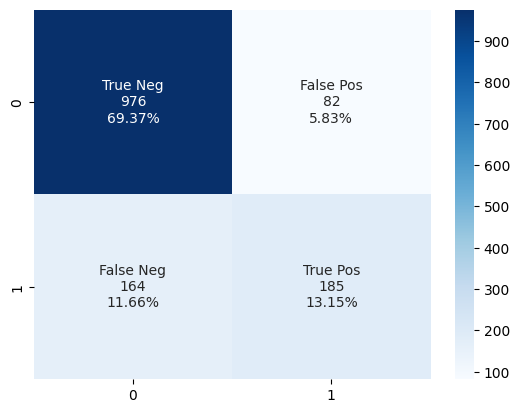

In [397]:
y=df['Churn']
X = df.drop(['Churn'], axis=1)


Xdum = pd.get_dummies(X)
st=StandardScaler()
Xdum_scaled=st.fit_transform(Xdum)

#using random forest classifier


X_train, X_test, y_train, y_test = train_test_split(Xdum_scaled, y, test_size=0.2, random_state=74,shuffle=True)

rand = RandomForestClassifier(n_estimators=700,
                              n_jobs=-1,
                              random_state =82,
                              max_leaf_nodes = 120)

#fitting the data
rand.fit(X_train,y_train)
y_pred7 = rand.predict(X_test)

print('Training Score : ',round(rand.score(X_train,y_train)*100, 2),'%')
print('Testing Score : ',round(rand.score(X_test,y_test)*100,2),'%')
print('Roc_Auc Score : ',round(roc_auc_score(y_test, y_pred7)*100,2),'%')
print(classification_report(y_test, y_pred7))
Plotconfusion(y_test,y_pred7)

# UnSupervised modelling

In [398]:
#Droping the target and gender
X=df.drop(['Churn','gender'], axis=1)
#Encoding the data
#Using label encoding to keep the dimension as it is , one hot encoding is a bad choise because we want to reduce dimensionality as possible
label_encoder = LabelEncoder()
label_df = X[X.select_dtypes(include=['object']).columns]
label_df = label_df.apply(label_encoder.fit_transform)
X = X.drop(label_df.columns, axis=1)
X = pd.concat([X, label_df], axis=1)
X.sample(5)

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Partner  \
4674              0       5           50.35       1285.80        1   
3416              0       2           69.85        837.50        0   
6596              0      15           81.25       5567.55        0   
5465              0       5           56.05       1553.20        0   
4845              0       4           39.40        825.40        1   

      Dependents  PhoneService  MultipleLines  InternetService  \
4674           1             1              0                0   
3416           1             1              0                0   
6596           0             1              2                0   
5465           0             1              0                0   
4845           1             0              1                0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
4674               0             0                 2            0   
3416               2             0                 0            0   
6596               2             2                 2            2   
5465               0             2                 2            0   
4845               2             0                 2            2   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  
4674            0                0         1                 0              3  
3416            2                2         0                 1              3  
6596            2                0         1                 0              2  
5465            0                0         1                 1              3  
4845            0                0         2                 1              1

Feature Engineering for Clustering

In [399]:
#Reducing dimensionality of the data by grouping all the services in one Feature
X['Services_sum']=X['OnlineSecurity']+X['OnlineBackup']+X['DeviceProtection']+X['TechSupport']+X['StreamingTV']+X['StreamingMovies']
X.drop(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1,inplace=True)
X['Services_sum'].value_counts()

Services_sum
6     2637
4     1033
2      966
8      850
0      693
10     569
12     284
Name: count, dtype: int64

In [400]:
#Scaling the Data , it's important to scale the data
#using power transformation in clustering is more effecient
pt = PowerTransformer()
X_scaled=pd.DataFrame(pt.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.sample(5)

SeniorCitizen    tenure  MonthlyCharges  TotalCharges   Partner  \
6220      -0.440327  1.312610        0.691233      1.378889  1.035617   
2910      -0.440327  1.312610       -0.014698      1.078684  1.035617   
3141      -0.440327 -1.466287        1.131229     -0.698063  1.035617   
1371      -0.440327 -1.466287        0.188971     -0.856956 -0.965608   
3954      -0.440327 -1.045321       -1.180858     -1.068619 -0.965608   

      Dependents  PhoneService  MultipleLines  InternetService  Contract  \
6220   -0.652305      0.327189       1.081271        -1.252966  1.346194   
2910    1.533025     -3.056334       0.334563        -1.252966  1.346194   
3141    1.533025      0.327189      -1.014958         0.290614 -0.887124   
1371   -0.652305      0.327189      -1.014958        -1.252966  0.794340   
3954   -0.652305     -3.056334       0.334563        -1.252966 -0.887124   

      PaperlessBilling  PaymentMethod  Services_sum  
6220          0.828939      -0.521258      1.474543  
2910          0.828939      -1.489780      2.066877  
3141          0.828939       1.320478      0.866777  
1371          0.828939       1.320478      0.239541  
3954          0.828939       1.320478     -1.106146

Elbow Graph

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

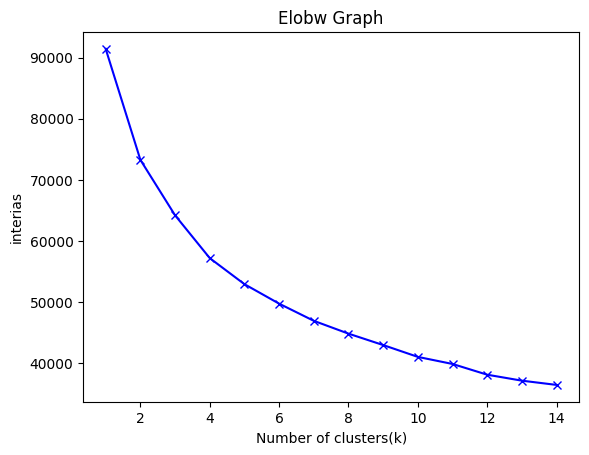

In [401]:
#Getting best number of clusters Using Elbow graph method
WCSS_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 15.
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 45)
    kmeans.fit(X_scaled)
    WCSS_list.append(kmeans.inertia_)
plt.plot(range(1, 15), WCSS_list,'bx-')
plt.title('Elobw Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('interias')
plt.show()

k means

In [402]:
# 4 clusters
#k means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)
k_predict1= kmeans.fit_predict(X_scaled)
print(silhouette_score(X_scaled, labels=k_predict1, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.21224338693655476


hierarchical

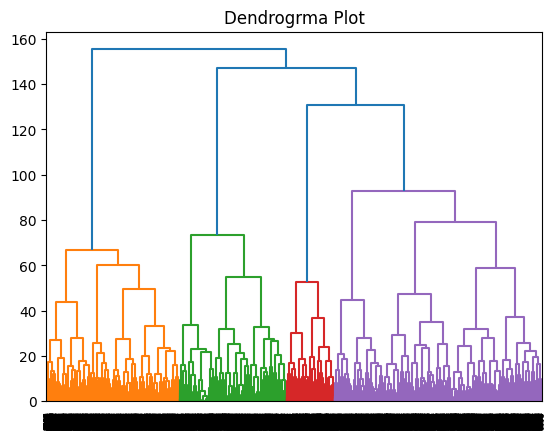

In [403]:
#Finding the optimal number of clusters using the dendrogram
dendro = shc.dendrogram(shc.linkage(X_scaled, method="ward"))
plt.title("Dendrogrma Plot")
plt.show()

In [404]:
#using hierarchical
hc= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_pred1= hc.fit_predict(X_scaled)
print(silhouette_score(X_scaled, labels=hc_pred1, metric='euclidean'))

0.18484015133076237


GMM

In [405]:
#using GMM
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_predict1 = gmm.fit_predict(X_scaled)
print(silhouette_score(X_scaled, labels=gmm_predict1, metric='euclidean'))

0.11813489745394877


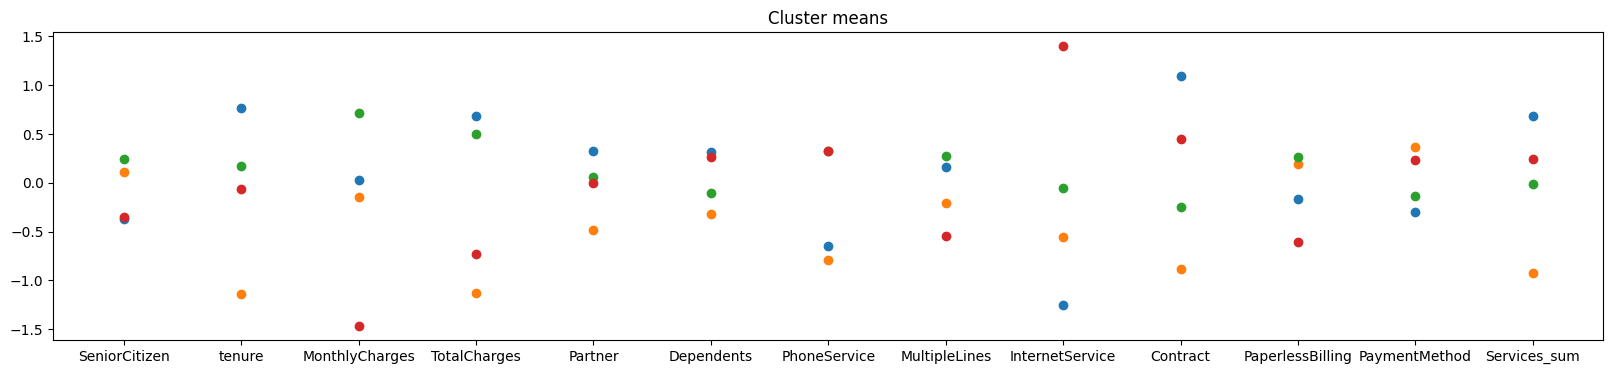

In [406]:
#plotting the position of the center of each cluster to visualise how well each feature is able to separate the different clusters.
plt.figure(figsize=(20,4))
for i in range(gmm.means_.shape[0]):
    plt.scatter(np.arange(X_scaled.shape[1]), gmm.means_[i])
plt.xticks(ticks=np.arange(X_scaled.shape[1]), labels=X_scaled.columns)
plt.title('Cluster means')
plt.show()

manually Feature Selection

In [407]:
#from plot I found that dropping these features is more efficient
X_scaled_drop=X_scaled.drop(['PaymentMethod','Dependents','Partner','SeniorCitizen','PaperlessBilling'],axis=1)
k_predict2= kmeans.fit_predict(X_scaled_drop)
print("k means score after dropping",silhouette_score(X_scaled_drop, labels=k_predict2, metric='euclidean'))
hc_pred2= hc.fit_predict(X_scaled_drop)
print("hierarchical  score after dropping",silhouette_score(X_scaled_drop, labels=hc_pred2, metric='euclidean'))
gmm_predict2 = gmm.fit_predict(X_scaled_drop)
print("GMM score after dropping",silhouette_score(X_scaled_drop, labels=gmm_predict2, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k means score after dropping 0.35701418194252116
hierarchical  score after dropping 0.33325769911112296
GMM score after dropping 0.3326321752249124


Text(0.5, 1.0, 'Predicted clusters')

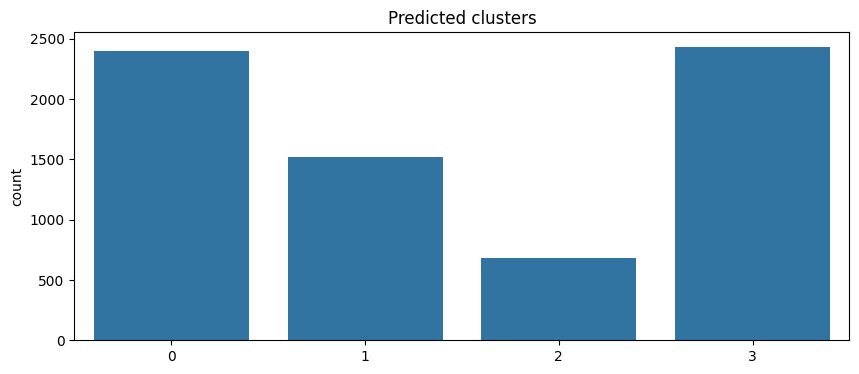

In [408]:
#Countplot
plt.figure(figsize=(10,4))
sns.countplot(x=k_predict2)
plt.title('Predicted clusters')

PCA

In [409]:
#PCA
components = PCA(n_components= X_scaled_drop.shape[1], random_state=42)
PCA_df=components.fit_transform(X_scaled_drop)
features = range(components.n_components_)

fig = px.bar(x=features, y=components.explained_variance_, template='plotly_dark')
fig.update_layout(title='PCA Features')
fig.update_xaxes(title_text="Features")
fig.update_yaxes(title_text="Variance")
fig.show()

In [410]:
# getting the top 3 principals from PCA:-
PCA_comp = PCA(n_components= 3, random_state=42).fit_transform(X_scaled_drop);
# 3D scatterplot
fig = px.scatter_3d(
    PCA_comp, x=0, y=1, z=2, color=k_predict2, size=0.1*np.ones(len(X_scaled_drop)), opacity = 1,
    title='clusters plot in 3D clusters without using PCA ',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500
)
fig.show()

Text(0.5, 1.0, 'clusters plot in 2D  without using PCA')

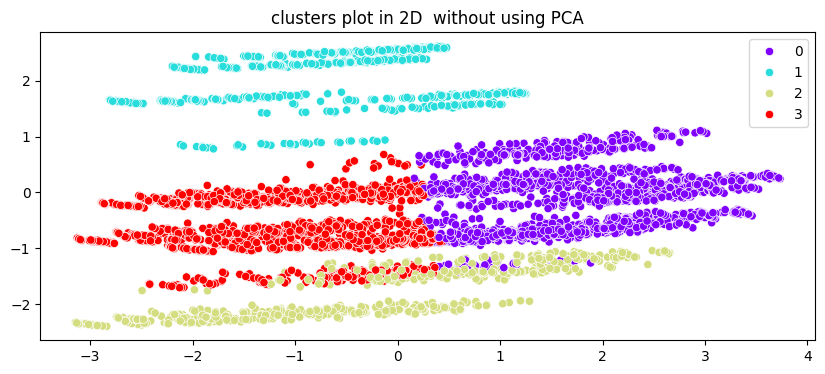

In [411]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=PCA_comp[:,0],
                y=PCA_comp[:,1],
                hue=k_predict2,

                palette="rainbow")
plt.title('clusters plot in 2D  without using PCA')

**Clustering using PCA**

In [412]:
#Clustering The PCA
k_predict3= kmeans.fit_predict(PCA_comp)
print("k means score with PCA",silhouette_score(PCA_comp, labels=k_predict3, metric='euclidean'))
hc_pred3= hc.fit_predict(PCA_comp)
print("hierarchical  score with PCA",silhouette_score(PCA_comp, labels=hc_pred3, metric='euclidean'))
gmm_predict3 = gmm.fit_predict(PCA_comp)
print("GMM score with PCA",silhouette_score(PCA_comp, labels=gmm_predict3, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k means score with PCA 0.4649238492009167
hierarchical  score with PCA 0.40345505580959606
GMM score with PCA 0.41352103025360926


In [413]:
fig = px.scatter_3d(
    PCA_comp, x=0, y=1, z=2, color=k_predict3, size=0.1*np.ones(len(X_scaled_drop)), opacity = 1,
    title='Kmeans-PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500
)
fig.show()
fig = px.scatter_3d(
    PCA_comp, x=0, y=1, z=2, color=hc_pred3, size=0.1*np.ones(len(X_scaled_drop)), opacity = 1,
    title='HC-PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500
)
fig.show()
fig = px.scatter_3d(
    PCA_comp, x=0, y=1, z=2, color=gmm_predict3, size=0.1*np.ones(len(X_scaled_drop)), opacity = 1,
    title='GMM-PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500
)
fig.show()

Text(0.5, 1.0, 'GMM-PCA plot in 2D')

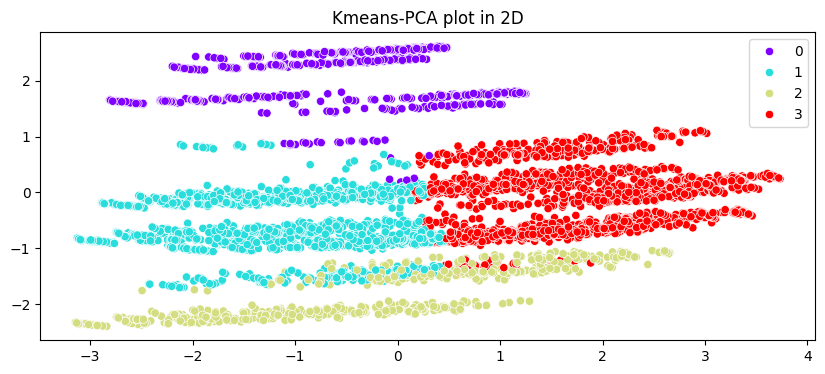

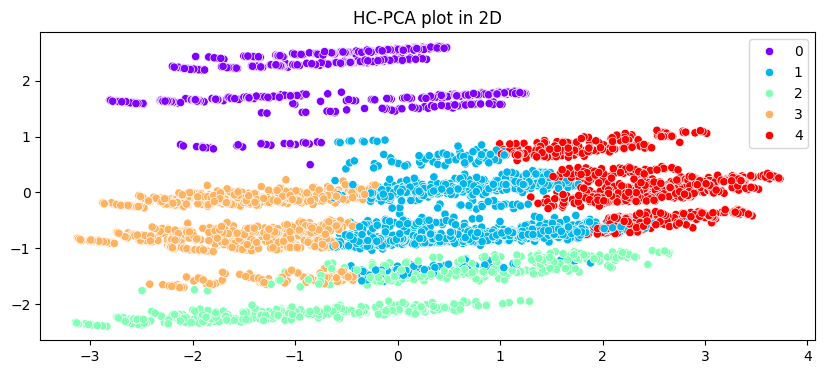

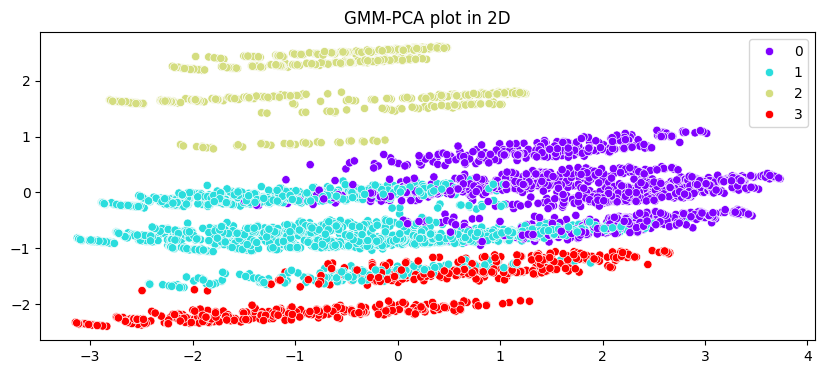

In [414]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=PCA_comp[:,0],
                y=PCA_comp[:,1],
                hue=k_predict3,

                palette="rainbow")
plt.title('Kmeans-PCA plot in 2D')
plt.figure(figsize=(10,4))
sns.scatterplot(x=PCA_comp[:,0],
                y=PCA_comp[:,1],
                hue=hc_pred3,

                palette="rainbow")
plt.title('HC-PCA plot in 2D')
plt.figure(figsize=(10,4))
sns.scatterplot(x=PCA_comp[:,0],
                y=PCA_comp[:,1],
                hue=gmm_predict3,

                palette="rainbow")
plt.title('GMM-PCA plot in 2D')

Text(0.5, 1.0, 'Predicted clusters')

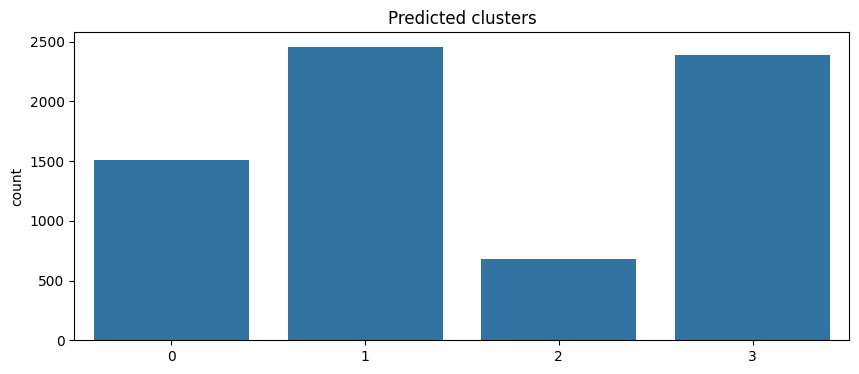

In [415]:
#Countplot
plt.figure(figsize=(10,4))
sns.countplot(x=k_predict3)
plt.title('Predicted clusters')

# Summary




*  most Customers with long contracts and MonthlyTenure like the service and don't churn , on the other hand ,most Cutomers with short contracts and MonthlyTenure Churn at the beginning of the service . I suggest that the Company should pay attention to the new customers espicially customers with mont to month contract.
*   SeniorCitizen Customers that churn are double than young People that churn,
while most of SeniorCitizen have long service with the company and more interesting that they pay more than young people . SeniorCitizen customers are very important to the company and the churn rate is quite high , Company must do better performance with Services with SeniorCitizen .





In [416]:
summary = {'Model': ['LogisticRegression', 'SVC', 'XGB classifier','RandomForest Classifier'],
           'Accuracy':['82.47 %', '82.11 %', '82.88 %','82.52 %']}
summary_df = pd.DataFrame(summary)
print('I tried to get Maximum results for each model')
summary_df

I tried to get Maximum results for each model


Model Accuracy
0       LogisticRegression  82.47 %
1                      SVC  82.11 %
2           XGB classifier  82.88 %
3  RandomForest Classifier  82.52 %